# Data Visualization with Python

Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>

Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This is a part of a tutorial prepared for TMF summer school on 03.07.2019

## Prerequisite: Access the MIMIC-III Dataset
The MIMIC (Medical Information Mart for Intensive Care) is a freely accessible database containing Intensive Care Unit (ICU) patients. The demo dataset is limited to 100 patients and publicly available as CSV files or as a single Postgres database backup file

>**Instruction to access the MIMIC demo dataset:**
<font size="3">
>1. Create an account on PhysioNet using the following link: https://physionet.org/register/
>2. Navigate to the project page: https://physionet.org/content/mimiciii-demo/
>3. Read the Data Use Agreement and click “I agree” to access the data
</font>

## Prerequisite: MIMIC-III files locally

You should place the following MIMIC-III data files in the `data/` subfolder:

* ADMISSIONS.csv
* PATIENTS.csv
* CPTEVENTS.csv

<img src="images/er_mimic.png" style="width:100%">

* Database description: https://mimic.physionet.org/gettingstarted/overview/
* Table description: https://mimic.physionet.org/mimictables/admissions/
* ER-Diagram: https://mit-lcp.github.io/mimic-schema-spy/relationships.html

**Agenda**
* <b>Pandas</b>
* </b>Pandas-Profiling</b>
* </b>Missingno</b>
* </b>Wordcloud</b>

## Pandas
http://pandas.pydata.org/pandas-docs/stable/reference/ <br>
Pandas is a Python library for exploring, processing, and model data

## Pandas supports charting a tabular dataset
DataFrame.plot([x, y], **kind**)
> **kind** :
* 'line': line plot (default)
* 'bar': vertical bar plot
* 'barh': horizontal bar plot
* 'hist': histogram
* 'box': boxplot
* 'kde': Kernel Density Estimation plot
* 'density': same as 'kde'
* 'area': stacked area plot
* 'pie': pie plot
* 'scatter': scatter plot
* 'hexbin': Hexagonal binning plot 


<img src="images/DataVisualisation.jpeg" style="height: 1000px;"/>

### Visualize the admission table

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import psycopg2
import getpass
# plot a figure directly on Notebook
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Create a database connection
user = 'postgres'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=getpass.getpass(prompt='Password:'.format(user)))
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [3]:
# Get length of stay from the icustays table
query = \
"""
SELECT *
FROM ADMISSIONS;
"""

a = pd.read_sql_query(query,con)

C:\Users\hassa\AppData\Local\Temp\ipykernel_20200\4020864777.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  a = pd.read_sql_query(query,con)


<Axes: ylabel='row_id'>

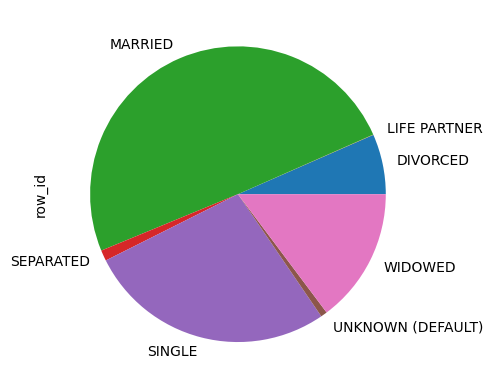

In [4]:
a.columns = map(str.lower, a.columns)
a.groupby(['marital_status']).count()['row_id'].plot(kind='pie')

<Axes: ylabel='religion'>

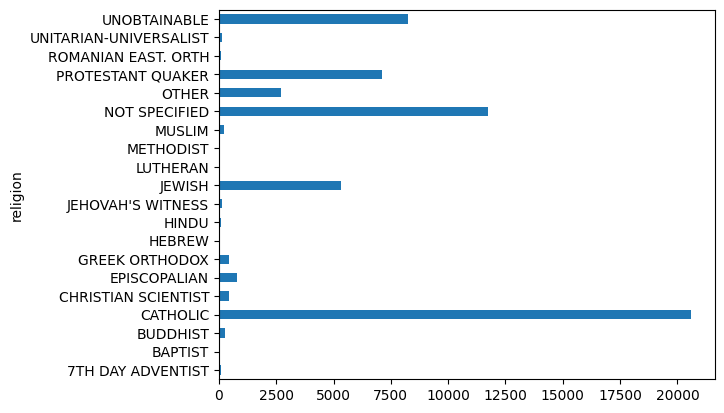

In [5]:
a.groupby(['religion']).count()['row_id'].plot(kind = 'barh') 

C:\Users\hassa\AppData\Local\Temp\ipykernel_20200\3448449488.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  p = pd.read_sql_query(query,con)


<Axes: ylabel='religion'>

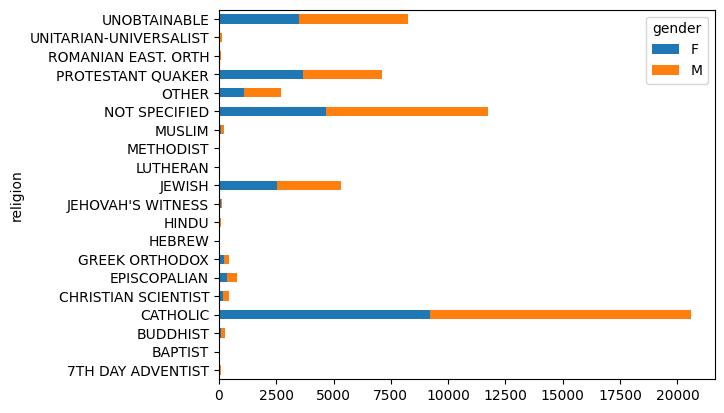

In [6]:
query = \
"""
SELECT *
FROM PATIENTS;
"""

p = pd.read_sql_query(query,con)
p.columns = map(str.lower, p.columns)
ap = pd.merge(a, p, on = 'subject_id' , how = 'inner')
ap.groupby(['religion','gender']).size().unstack().plot(kind="barh", stacked=True)

C:\Users\hassa\AppData\Local\Temp\ipykernel_20200\3822510270.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  c = pd.read_sql_query(query,con)


<Axes: ylabel='discharge_location'>

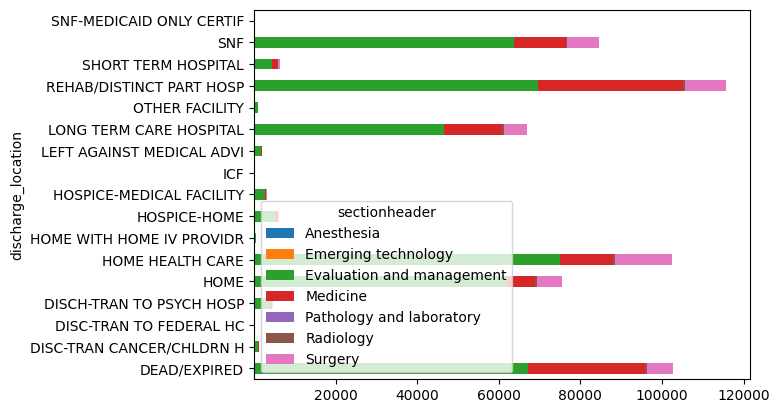

In [7]:
query = \
"""
SELECT *
FROM CPTEVENTS;
"""

c = pd.read_sql_query(query,con)

c.columns = map(str.lower, c.columns)
ac = pd.merge(a, c, on = 'hadm_id' , how = 'inner')
ac.groupby(['discharge_location','sectionheader']).size().unstack().plot(kind="barh", stacked=True)

**Agenda**
* </b>Pandas</b>
* <b>Pandas-Profiling</b>
* </b>Missingno</b>
* </b>Wordcloud</b>

## Pandas-Profiling
https://github.com/pandas-profiling/pandas-profiling <br>
Pandas-Profiling is a Python library for exploratory data analysis

### Import pandas-profiling (1/3)

In [9]:
# !conda install -c conda-forge pandas-profiling -y
from ydata_profiling import ProfileReport

### Load the admissions table (2/3)

In [10]:
a.columns = map(str.lower, a.columns)

### Profile the table (3/3)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


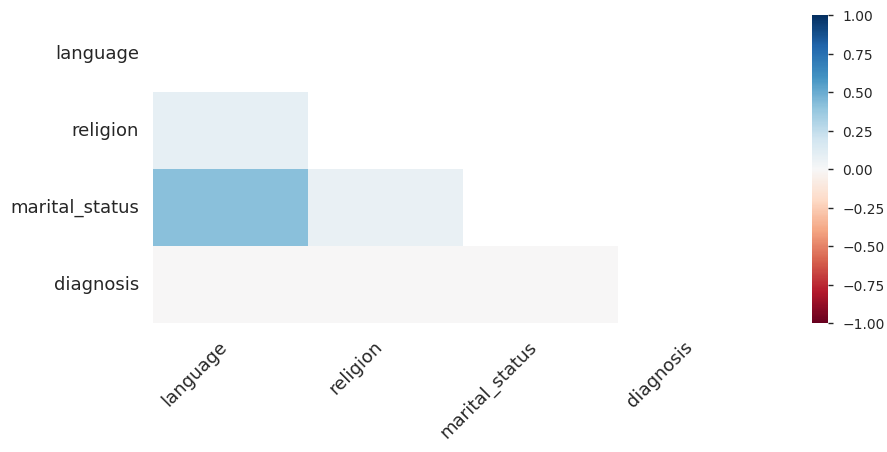

In [13]:
# ignore the times when profiling since they are uninteresting
cols = [c for c in a.columns if not c.endswith('time')]
ProfileReport(a[cols])

**Agenda**
* </b>Pandas</b>
* </b>Pandas-Profiling</b>
* <b>Missingno</b>
* </b>Wordcloud</b>

## Missingno
https://github.com/ResidentMario/missingno <br>
Missingno offers a visual summary of the completeness of a dataset. This example brings some intuitive thoughts about `ADMISSIONS` table: 
* Not every patient is admitted to the emergency department as there are many missing values in `edregtime` and `edouttime`.
* `language` data of patients is mendatory field, but it used to be not.

In [ ]:
# !conda install -c conda-forge missingno -y
import missingno as msno
msno.matrix(a)

**Agenda**
* </b>Pandas</b>
* </b>Pandas-Profiling</b>
* </b>Missingno</b>
* <b>Wordcloud</b>

## Wordcloud
https://github.com/amueller/word_cloud <br>
Wordcloud visualizes a given text in a word-cloud format <br>
This example illustrates that majority of patients suffered from sepsis

### Import the Wordcloud package (1/4)

In [ ]:
# !conda install -c conda-forge wordcloud -y
from wordcloud import WordCloud

### Prepare an input text in string (2/4)

In [ ]:
text = str(a['diagnosis'].values)

### Generate a word-cloud from the input text (3/4)

In [ ]:
wordcloud = WordCloud().generate(text)

### Plot the word-cloud (4/4)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Question?
Authors: Prof. med. Thomas Ganslandt <Thomas.Ganslandt@medma.uni-heidelberg.de> <br>
and Kim Hee <HeeEun.Kim@medma.uni-heidelberg.de> <br>

Heinrich-Lanz-Center for Digital Health (HLZ) of the Medical Faculty Mannheim <br>
Heidelberg University

This is a part of a tutorial prepared for TMF summer school on 03.07.2019